# Анализ рынка недвижимости сервиса Яндекс Недвижимость

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
try:
    data = pd.read_csv(r'datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
plt.show()
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Согласно документации к данным:
-	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
-	`balcony` — число балконов
-	`ceiling_height` — высота потолков (м)
-	`cityCenters_nearest` — расстояние до центра города (м)
-	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
-	`first_day_exposition` — дата публикации
-	`floor` — этаж
-	`floors_total` — всего этажей в доме
-	`is_apartment` — апартаменты (булев тип)
-	`kitchen_area` — площадь кухни в квадратных метрах (м²)
-	`last_price` — цена на момент снятия с публикации
-	`living_area` — жилая площадь в квадратных метрах (м²)
-	`locality_name` — название населённого пункта
-	`open_plan` — свободная планировка (булев тип)
-	`parks_around3000` — число парков в радиусе 3 км
-	`parks_nearest` — расстояние до ближайшего парка (м)
-	`ponds_around3000` — число водоёмов в радиусе 3 км
-	`ponds_nearest` — расстояние до ближайшего водоёма (м)
-	`rooms` — число комнат
-	`studio` — квартира-студия (булев тип)
-	`total_area` — общая площадь квартиры в квадратных метрах (м²)
-	`total_images` — число фотографий квартиры в объявлении


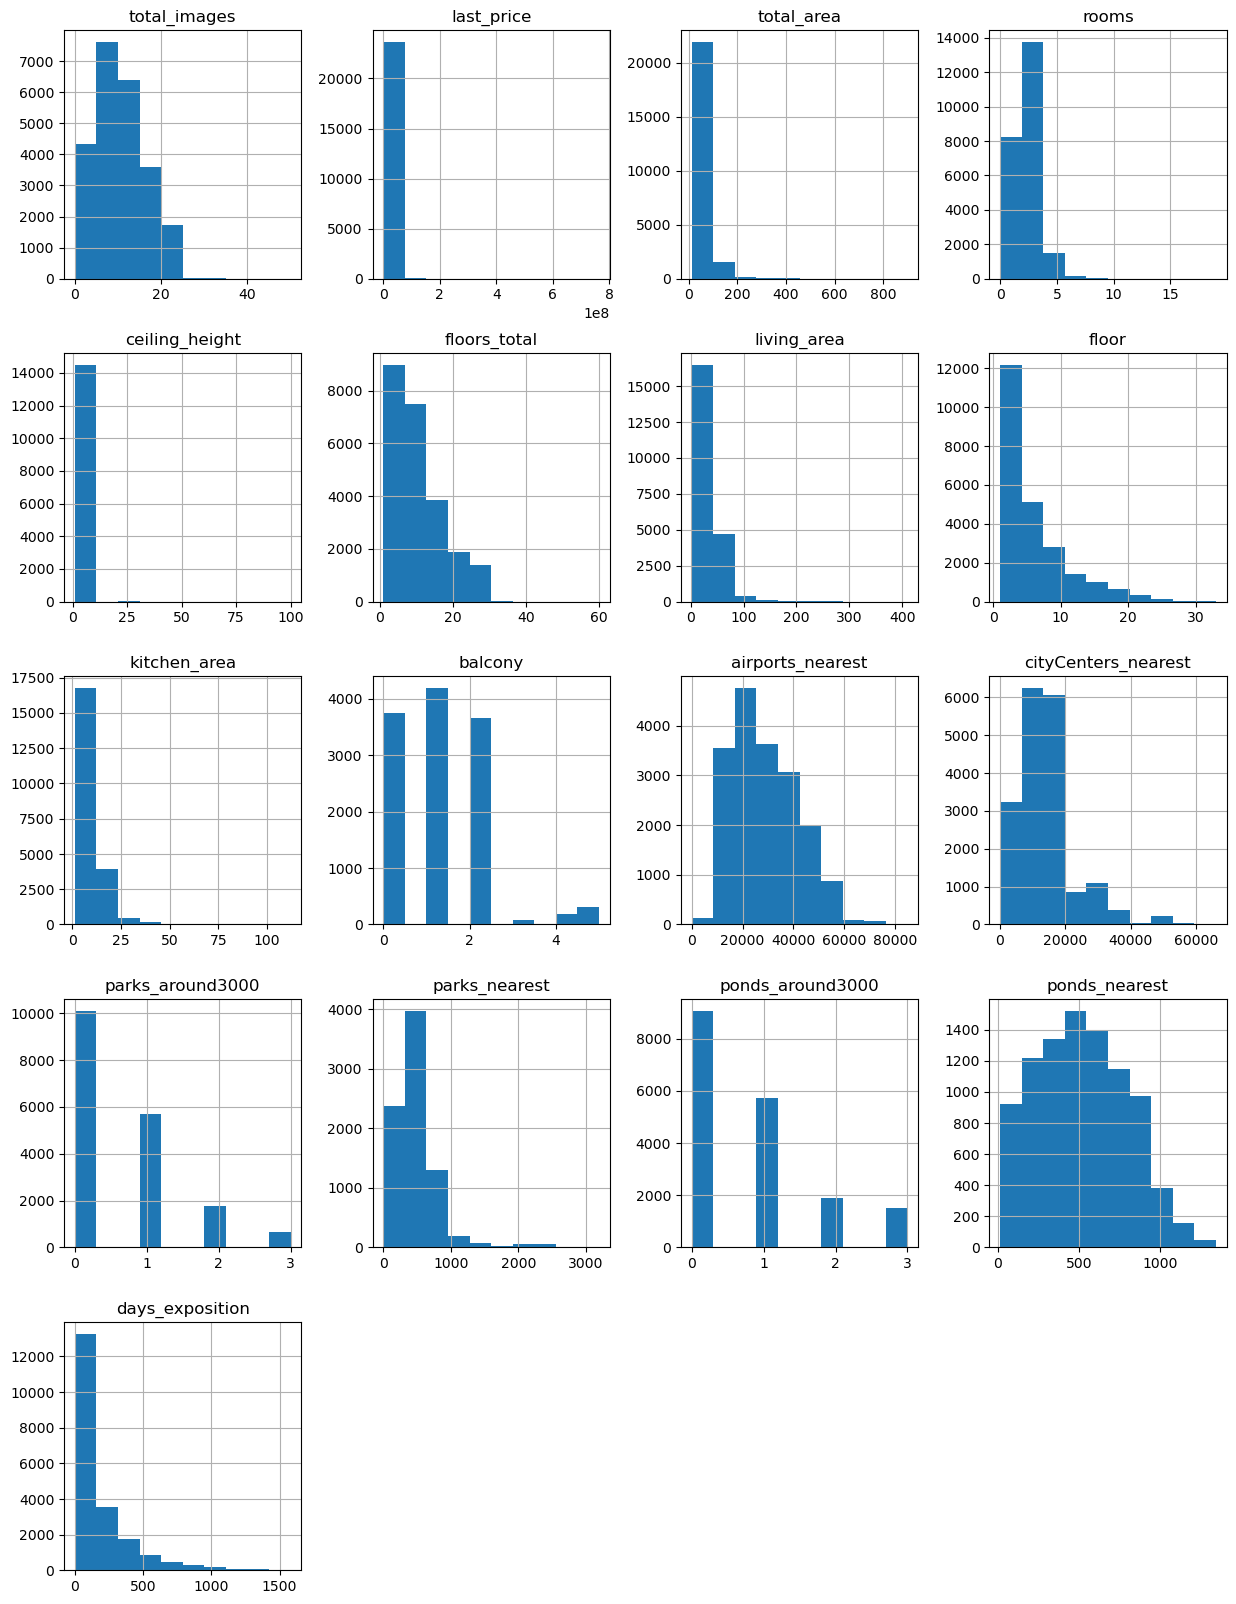

In [6]:
data.hist(figsize=(15, 20));
# или применить метод plt.show()

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [10]:
data.duplicated().sum()

0

### Общая картина базы данных.
- Большое количество пропусков.
- Неверный тип данных некоторых колонок.
- Отсутствуют отрицательные значения.
- Некорректное название колонки `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`.
- Много значений близких к 0.
- Явные дубликаты отсутствуют.

Слишком большие значения наблюдаются в стобцах: 
- `total_area` 900м2 (либо это очень большая квартира не для каждого, либо ошибка)
- `ceiling_height` до 100 м (вряд ли существуют такие высокие потолки)
- `rooms` 19 комнат, `living_area` 400 м2 и `kitchen_area` 112 м2 (хм, как раз есть значения с 900м2 общей площадью)
- `days_exposition` 1580 дней (да кому вообще нужна эта квартира в 900м2, там только пыли на строительство полноценной однушки можно насобирать)

Согласно гистограммам:


Большинство квартир с общей площадью до 80м2, жилой площадью до 40м2 и площадью кухни до 15м2, в основном 2-3 комнатные, в малоэтажных домах. Квартир, имеющих балконы, примерно в два раза больше квартир без балконов. В основном до аэропорта 10-30 км, а до центра города 10-20 км. Примерно половина квартир имеют рядом парк и/или водоем на расстоянии в 3 км, причем у большинства расстояние до ближайшего парка или водоема 500 м. Довольно неплохо. Есть где провести время с семьей. 

Фото квартиры колеблется в районе 8-13 фото (а максимальное число аж 50 фото: кто-то очень постарался). Размещаются квартиры на портале, в основном, до 3-х месяцев.



## Предобработка данных

#### Корректировка названий колонок

In [11]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest',
                              'parks_around3000': 'parks_around_3000',
                              'ponds_around3000': 'ponds_around_3000'
                             })

In [12]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Заполнение пропусков и корректировка неявных дубликатов

Для таких значений, как наличие балкона, статус апартаменты, высота потолков, жилая площадь и площадь кухни лучше руководствоваться следующим правилом: заполнить типовым значением. Так как эти параметры при заполнении видимо посчитали не важными, а что тут важного? Правильно, все как у всех. Конечно, существует риск утери данных в процессе сбора, хранения и копирования. Но что тут гадать, пора действовать. 

Тем более, чем больше данных мы сохраним, тем точнее картинка. Там где пропусков мало - влияние синтетических данных будет крайне мало, но обязательно нужно помнить про большую часть синтетических данных в таких столбцах, как балкон (чуть меньше половины пропусков), высота потолков (треть).

- Пропущенные значения у балконов `('balcony')` замена на `0`. Что-что, а балкон огромное преимущество и такую графу в объявлении обязательно заполнили.
- Апартаменты `('is_apartment')`: графу оставили пустой, можно сделать вывод, что квартира не является апартаментами, либо владелец сам не знает (хотя различия жилого помещения и апартаментов существенны). Замена пропусков на `False`.
- Пропущенных значений в названии населенных пунктах `('locality_name')` всего ничего. Можно данные удалить, а можно обозначить за `'Unknown'`. В любом случае это будет незаметно на общем фоне. 
- Высота потолков `('is_apartment')` согласно текущим СНИП колеблется от 2.5 м до 2.7 м в зависимости от климатической зоны. Из информации о таблице и данных выше медиана данного показателя равна 2.65м. Вполне устраивает.
- Конечно, жилую площадь `('living_area')` и площадь кухни `('kitchen_area')` не совсем правильно заполнять медианными значениями в разбивке на группы в зависимости от количества комнат. Очень много зависит и от года постройки, и от типовых решений застройщика, и от фантазии проектировщика. Но, здесь именно так и сделаем.

In [13]:
data.is_apartment = data.is_apartment.fillna(False)
data.balcony = data.balcony.fillna(0.0)
data.locality_name = data.locality_name.fillna('Unknown')
data.ceiling_height = data.ceiling_height.fillna(data.ceiling_height.median())


In [14]:
for room in sorted(data['rooms'].unique()):
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == room), 'kitchen_area'].median()


In [15]:
data['living_area'].isna().sum()

0

In [16]:
data['kitchen_area'].isna().sum()

197

197 пустых значений площади кухни ('kitchen_area'). По каким-то комнатам нет данных?

In [17]:
data[data['kitchen_area'].isna()].rooms.unique()

array([0], dtype=int64)

In [18]:
len(data[data['rooms'] == 0])

197

Вот и причина, в квартирах с 0 комнатами не указана площадь кухни. Предположительно это студии. Такие пропуски заполним `0`. Кому нужна кухня, когда и так спать негде.

In [19]:
data.kitchen_area = data.kitchen_area.fillna(0.0)
data['kitchen_area'].isna().sum()

0

In [20]:
len(data.query("rooms == 0 & studio == True"))

138

In [21]:
len(data.query("studio == True"))

149

Для заполнения пропусков во `floors_total` нет конкретной привязки ни к одному из других показателей, поэтому в этом столбце пропуски заполним таким способом, чтоб этаж у данного объекта был не последний.

In [22]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor'] + 1

Для корректного заполнения пропусков по столбцах `'airports_nearest', 'city_centers_nearest','parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest'` нужна привязка к местности `locality_name`. Из задания на проект известно, что такие данные картографические (наверное имелось ввиду, что заполняются автоматически в зависимости от расположения). Заполнить их можно так же медианами в разбивке на группы по локациям. 


Пропуски в этих столбцах могли быть вызваны отсутствием данным по этим столбцам в картографической базе данных, а так же `locality_name` могло быть указано с ошибкой, что не позволило привязать к ней данные из картографической базы данных.

Можно надеяться на корректность заполнения `locality_name`, но лучше на данном этапе уже привести в порядок значения в этом столбце. Для этого проверка уникальных значений.

In [23]:
sorted(data.locality_name.unique())

['Unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

Что бросается в глаза?
- Поселок и посёлок (однозначно одно и то же).
- Отсутствие типа населенного пункта у некоторых названий (тут только предположить, что название без типа населенного пункта и с типом одно и то же).
- Поселок, поселок городского типа, коттеджный поселок, городской поселок (более вероятно что одно и то же).
- Деревня/Село/Садовое товарищество и поселок с одинаковыми названиями (если садовое товарищество более вероятно может называться как приближенный населенный пункт, то деревня/село/поселок могут быть в разных локациях).

Кто вообще допускает, чтоб пользователь сам вводил адрес? Где автоматизация этого процесса?

Поэтому обработаем значения в столбце с локацией согласно принятым выше предположениям.


In [24]:
name = list(data.locality_name)    # лист с названиями населенных пунктов
for row in range(len(name)):
    name[row] = sorted(name[row].split())
    if 'посёлок' in name[row]:    # замена ё на е
        name[row][name[row].index('посёлок')] = 'поселок'
    for elem in range(len(name[row])):    # отбрасывание лишних элементов в названии населенных пунктов
        if name[row][elem] != name[row][elem].title() and (name[row][elem].lower() not in ('поселок', 'деревня', 'село')):
            name[row][elem] = ''
    name[row] = ' '.join(' '.join(name[row]).split())

name

['Санкт-Петербург',
 'Шушары поселок',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Янино-1 поселок',
 'Парголово поселок',
 'Санкт-Петербург',
 'Мурино поселок',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Парголово поселок',
 'Санкт-Петербург',
 'Кудрово деревня',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Пушкин',
 'Санкт-Петербург',
 'Коммунар',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Колпино',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Бор Красный поселок',
 'Мурино поселок',
 'Санкт-Петербург',
 'Парголово поселок',
 'Санкт-Петербург',
 'Петергоф',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Гатчина',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Пушкин',
 'Санкт-Петербург',
 'Санкт-Петербург',
 'Парголо

Проверка на совпадение названий населенных пунктов

In [25]:
def unique_name():    # функция проверки на совпадение названий населенных пунктов
    unique_name = sorted(list(set(name)))    # уникальные строки
    l = len(unique_name)
    name_cut = unique_name.copy()
    for row in range(l):
        name_cut[row] = name_cut[row].replace('поселок', '').replace('деревня', '').replace('село', '').strip()

    for i in range(l):
        for j in range(i+1, l):
            if name_cut[i] == name_cut[j]:
                print(unique_name[i], 'и' ,unique_name[j])

In [26]:
unique_name()

Гарболово деревня и Гарболово поселок
Зимитицы деревня и Зимитицы поселок
Калитино деревня и Калитино поселок
Кудрово и Кудрово деревня
Любань и Любань поселок
Мурино и Мурино поселок
Никольское и Никольское село
Павлово поселок и Павлово село
Приладожский и Приладожский поселок
Рабитицы деревня и Рабитицы поселок
Рахья и Рахья поселок
Фёдоровское деревня и Фёдоровское поселок
Щеглово деревня и Щеглово поселок


Проверка расположения через яндекс поиск.

Одно и то же:
- Гарболово деревня и Гарболово поселок.
- Кудрово и Кудрово деревня.
- Мурино и Мурино поселок
- Приладожский и Приладожский поселок
- Рахья и Рахья поселок
- Фёдоровское деревня и Фёдоровское поселок

Не одно и то же:
- Зимитицы деревня и Зимитицы поселок (расположены в одной локации).
- Калитино деревня и Калитино поселок (расположены в одной локации).
- Любань и Любань поселок (расположены в одной локации).
- Никольское и Никольское село
- Павлово поселок и Павлово село
- Рабитицы деревня и Рабитицы поселок
- Щеглово деревня и Щеглово поселок (расположены в одной локации).

Корректировка `name` с учетом вышесказанного: приведение к единому наименованию одни и те же локации, а так же населенные пункты, расположенные в одной локации.

In [27]:
re_name = {'Гарболово деревня': 'Гарболово',
           'Гарболово поселок': 'Гарболово',
           'Кудрово деревня': 'Кудрово',
           'Любань поселок': 'Любань',
           'Мурино поселок': 'Мурино',
           'Приладожский поселок': 'Приладожский',
           'Рахья поселок': 'Рахья',
           'Фёдоровское деревня': 'Фёдоровское',
           'Фёдоровское поселок': 'Фёдоровское',
           'Зимитицы деревня': 'Зимитицы',
           'Зимитицы поселок': 'Зимитицы',
           'Калитино деревня': 'Калитино',
           'Калитино поселок': 'Калитино',
           'Щеглово деревня': 'Щеглово',
           'Щеглово поселок': 'Щеглово'            
          }

for i in range(len(name)):
    if name[i] in re_name:
        name[i] = re_name[name[i]]

In [28]:
unique_name()

Никольское и Никольское село
Павлово поселок и Павлово село
Рабитицы деревня и Рабитицы поселок


In [29]:
data.locality_name = name    # присваивание DataFrame столбцу новых занечений

In [30]:
for name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == name) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == name), 'airports_nearest'].median()
    
    data.loc[(data['locality_name'] == name) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == name), 'city_centers_nearest'].median()
    
    data.loc[(data['locality_name'] == name) & (data['parks_around_3000'].isna()), 'parks_around_3000'] = \
    data.loc[(data['locality_name'] == name), 'parks_around_3000'].median()
    
    data.loc[(data['locality_name'] == name) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == name), 'parks_nearest'].median()
    
    data.loc[(data['locality_name'] == name) & (data['ponds_around_3000'].isna()), 'ponds_around_3000'] = \
    data.loc[(data['locality_name'] == name), 'ponds_around_3000'].median()
    
    data.loc[(data['locality_name'] == name) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == name), 'ponds_nearest'].median()

In [31]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4829
city_centers_nearest    4829
parks_around_3000       4829
parks_nearest           5998
ponds_around_3000       4829
ponds_nearest           4938
days_exposition         3181
dtype: int64

Картина намного лучше, в сравнении с тем что было. 

Так как группировка была по населенному пункту, а пустые значения остались, можно сделать вывод, что в радиусе 3000 м нет ни парка, ни водоема. Поэтому ponds_around_3000 и parks_around_3000 можно заполнить `0`. 

Расстояние до ближайшего парка и/или водоема, а так же расстояния до центра города и ближайшего аэропорта можно оставить пустыми, так как пути рационального заполнения этих данных привязать не к чему в нашей базе. Однако, чтобы не получить ошибку в вычислениях, а так же визуально эти данные были на графиках, то заполним пропуски максмальным значением с поправкой на коэффициент 1.1 (так можно отличить эти синтетические значения от реальных). Почему именно максимальным? Данные объекты видимо очень сильно удалены от парков, водоемов, центра города и аэропорта.

In [32]:
data.parks_around_3000 = data.parks_around_3000.fillna(0.0)
data.ponds_around_3000 = data.ponds_around_3000.fillna(0.0)
data.airports_nearest = data.airports_nearest.fillna(data.airports_nearest.max() * 1.1)
data.city_centers_nearest = data.city_centers_nearest.fillna(data.city_centers_nearest.max() * 1.1)
data.parks_nearest = data.parks_nearest.fillna(data.parks_nearest.max() * 1.1)
data.ponds_nearest = data.ponds_nearest.fillna(data.ponds_nearest.max() * 1.1)

Пропуски значений в `days_exposition` могут быть обусловены потерей части данных, так как человеческий фактор тут исключен. Привязать такие данные к чему либо в базе данных нет возможности (есть дата размещения, а даты снятия с публикации нет). Минимальное значение по данному столбцу `1`. Чтобы не потерять даннные, а так же преобразование типа столбца не выдало ошибку (столбцы с количественными значениями и Nan могут иметь только тип float) пропуски заменим на 0: и данные не потерялись, и своебразный флаг пропушенных значений.

Косвенно можно предположить, что объявление было размещено и снято (по какой либо причине) в один и тот же день. Что тоже дает право на заполнение пропусков 0.

In [33]:
data.days_exposition = data.days_exposition.fillna(0)
#for name in data['locality_name'].unique():
#    data.loc[(data['locality_name'] == name) & (data['days_exposition'].isna()), 'days_exposition'] = \
#    data.loc[(data['locality_name'] == name), 'days_exposition'].median()
#data.days_exposition = data.days_exposition.fillna(data.days_exposition.median())

Повторная проверка на явные дубликаты с учетом преобразования имени населенного пункта.

In [34]:
data.duplicated().sum()

0

In [35]:
data.shape

(23699, 22)

#### Типы данных в столбцах.

- Общее количество этажей `floors_total`, балконов `balcony`, дней размещения `days_exposition`, количество парков `parks_around_3000` и количество водаемов `ponds_around_3000` имеют вещественный тип данных, хотя подразумевает целочисленный. Не может же быть 1,5 балкона и 7,5 этажного дома. 2.5 дня может быть, но из описания данных понятно, что дни - целые.
- Статус апартаменты `is_apartment` имеет тип объект, или строка - хотя здесь более уместен булевый тип.
- `first_day_exposition` тип объект, а работать лучше будет со специальным типом datetime.

In [36]:
data.balcony = data.balcony.astype('int')
data.is_apartment = data.is_apartment.astype('bool')
data.floors_total = data.floors_total.astype('int')
data.parks_around_3000 = data.parks_around_3000.astype('int')
data.ponds_around_3000 = data.ponds_around_3000.astype('int')
data.days_exposition = data.days_exposition.astype('int')
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%dT%H:%M:%S')

#### Редкие и выбивающиеся значения

Выбросами обычно называют значения, выходящие за пределы (усы) так называемого ящика с усами.

Для определения выбросов построим boxplot.

In [37]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.675092,34.321982,5.892358,10.377514,0.591080,42536.552053,26296.541508,0.469134,1243.594181,0.643614,702.330065,156.608844
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.595719,21.700627,4.885249,5.720157,0.959298,28227.399831,24631.142417,0.748593,1334.338057,0.904877,438.839917,213.546873
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,21176.000000,10913.500000,0.000000,460.000000,0.000000,503.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,33331.000000,14949.000000,0.000000,460.000000,0.000000,503.000000,74.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,51553.000000,31018.500000,1.000000,3509.000000,1.000000,885.500000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,93355.900000,72564.800000,3.000000,3509.000000,3.000000,1478.400000,1580.000000


Высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.

In [38]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
data.ceiling_height = data.ceiling_height.fillna(data.ceiling_height.median())

<Axes: >

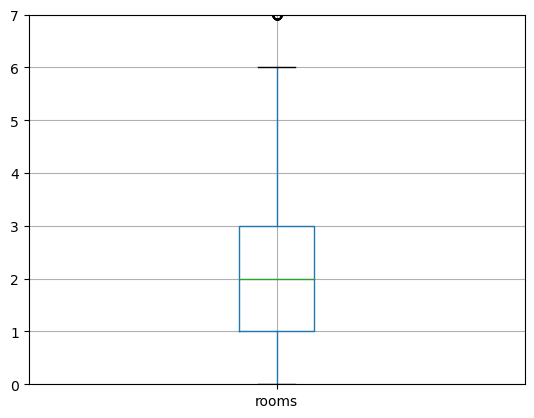

In [39]:
plt.ylim(0, 7)
data.boxplot(column='rooms')

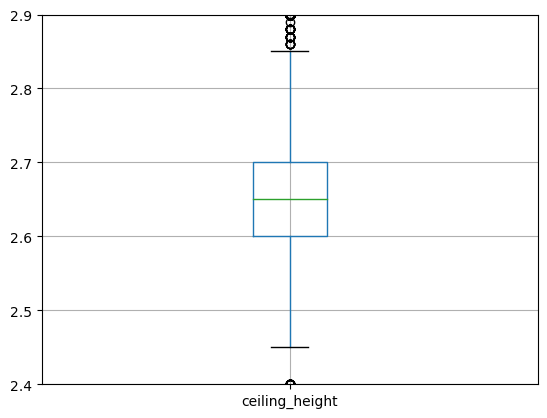

In [40]:
plt.ylim(2.4, 2.9)
data.boxplot(column='ceiling_height');

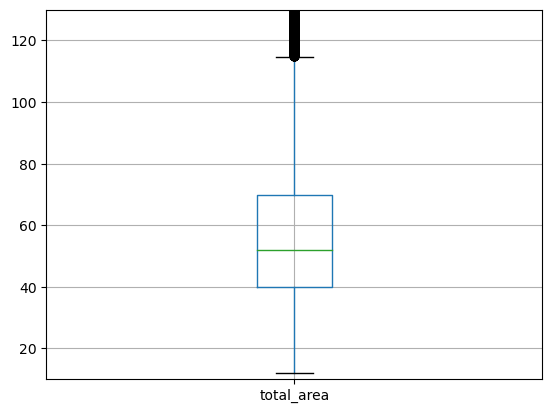

In [41]:
plt.ylim(10, 130)
data.boxplot(column='total_area');

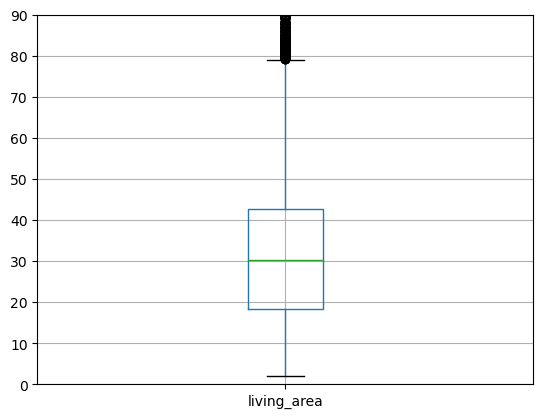

In [42]:
plt.ylim(0, 90)
data.boxplot(column='living_area');

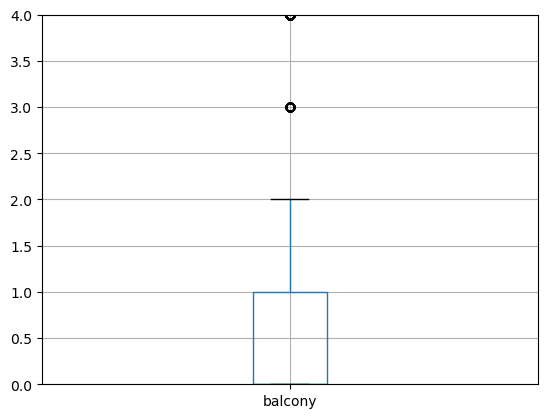

In [43]:
plt.ylim(0, 4)
data.boxplot(column='balcony');

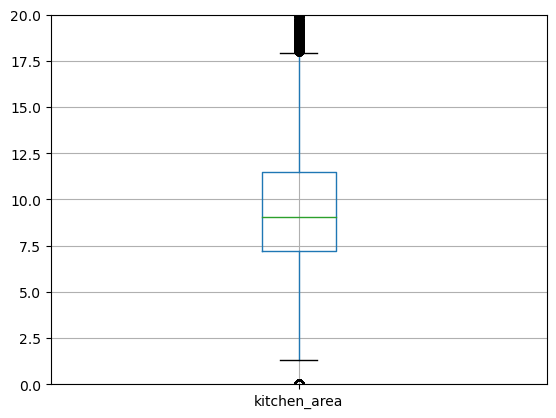

In [44]:
plt.ylim(0, 20)
data.boxplot(column='kitchen_area');

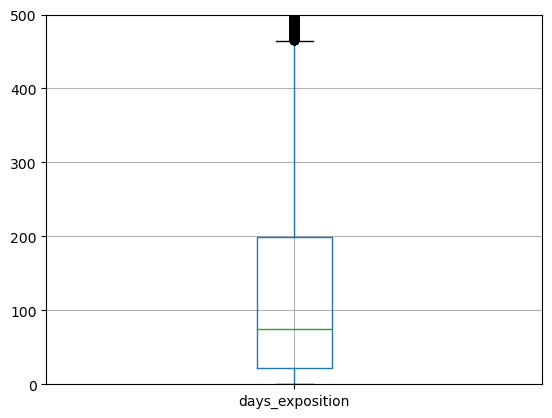

In [45]:
plt.ylim(0,500)
data.boxplot(column='days_exposition');

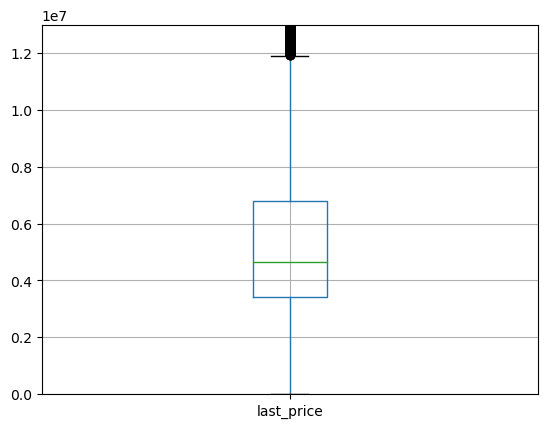

In [46]:
plt.ylim(0, 13_000_000)
data.boxplot(column='last_price');

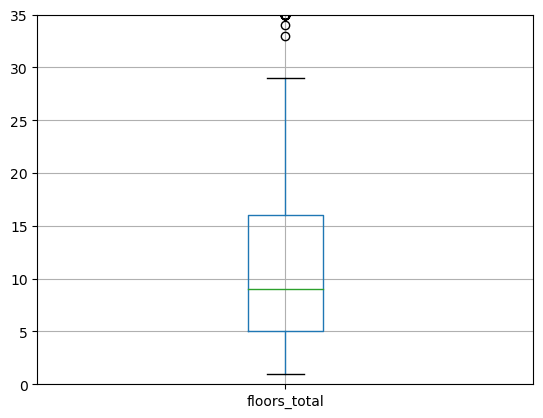

In [47]:
plt.ylim(0, 35)
data.boxplot(column='floors_total');

In [48]:
data_clear = data.query(" \
                  (2.40 <= ceiling_height <= 2.90) and \
                  (rooms <= 6) and \
                  (balcony <=3) and \
                  (kitchen_area <=22) and \
                  (1 <= floors_total <= 32) and \
                  (10 <= total_area <= 150) and \
                  (10 <= living_area <= 130) and \
                  (days_exposition <= 480) and \
                  (last_price <= 15_000_000)  \
                  " ).copy()
data_clear.shape

(18260, 22)

In [49]:
data_clear.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,18260.000000,1.826000e+04,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000,18260.000000
mean,9.720646,4.735610e+06,51.869199,1.886692,2.629942,11.105312,29.701330,6.050602,9.177047,0.540033,44595.088740,28754.031999,0.376451,1347.328176,0.549069,734.022284,105.273549
std,5.547834,2.344194e+06,18.312570,0.894714,0.084335,6.608154,12.915932,4.952766,3.113731,0.780736,29169.830087,24929.556419,0.663008,1382.398150,0.819722,447.964375,113.447640
min,0.000000,4.300000e+05,12.000000,0.000000,2.400000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,399.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.250000e+06,38.000000,1.000000,2.570000,5.000000,18.000000,2.000000,7.000000,0.000000,20750.250000,12180.000000,0.000000,460.000000,0.000000,503.000000,21.000000
50%,9.000000,4.250000e+06,47.000000,2.000000,2.650000,9.000000,29.000000,5.000000,9.000000,0.000000,35646.000000,15853.000000,0.000000,460.000000,0.000000,503.000000,61.000000
75%,14.000000,5.700000e+06,61.900000,3.000000,2.650000,16.000000,38.000000,8.000000,10.700000,1.000000,53734.000000,34341.000000,1.000000,3509.000000,1.000000,992.000000,153.000000
max,39.000000,1.500000e+07,148.000000,6.000000,2.900000,29.000000,128.000000,27.000000,22.000000,3.000000,93355.900000,72564.800000,3.000000,3509.000000,3.000000,1478.400000,480.000000


In [50]:
len(data_clear) / len(data) * 100

77.04966454280772

Около 23% данных отброшено, но зачем нам эти выбросы? Они исказят суть исследования. А если еще удалить все строки, имеющие пропуски? Хорошо, что это не сделано, а важные пропуски заполнены.

## Посчитайте и добавьте в таблицу новые столбцы

- Цена одного квадратного метра

In [51]:
data_clear['price_per_m2'] = round(data_clear['last_price'] / data_clear['total_area'])
data_clear['price_per_m2'].head()

1     82921.0
5     95066.0
6     99196.0
7    110545.0
8     87455.0
Name: price_per_m2, dtype: float64

- День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [52]:
data_clear['weekday'] = data_clear.first_day_exposition.dt.weekday
data_clear[['weekday','first_day_exposition']].head()

,weekday,first_day_exposition
1,1,2018-12-04
5,0,2018-09-10
6,3,2017-11-02
7,3,2019-04-18
8,2,2018-05-23


- Месяц публикации объявления

In [53]:
data_clear['month'] = pd.DatetimeIndex(data_clear.first_day_exposition).month
data_clear[['month','first_day_exposition']].head()

,month,first_day_exposition
1,12,2018-12-04
5,9,2018-09-10
6,11,2017-11-02
7,4,2019-04-18
8,5,2018-05-23


- Год публикации объявления

In [54]:
data_clear['year'] = pd.DatetimeIndex(data_clear.first_day_exposition).year
data_clear[['year', 'first_day_exposition']].head()

,year,first_day_exposition
1,2018,2018-12-04
5,2018,2018-09-10
6,2017,2017-11-02
7,2019,2019-04-18
8,2018,2018-05-23


- Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [55]:
data_clear['floor_type'] = 'другой'
data_clear['floor_type'] = data_clear['floor_type'].where(data_clear.floor != 1, 'первый')
data_clear['floor_type'] = data_clear['floor_type'].where(data_clear.floor != data_clear.floors_total, 'последний')
data_clear[['floor_type', 'floor', 'floors_total']].head(10)

,floor_type,floor,floors_total
1,первый,1,11
5,другой,5,12
6,другой,6,26
7,другой,22,24
8,другой,26,27
9,другой,7,9
10,другой,3,12
11,другой,4,5
12,последний,5,5
13,последний,5,5


- Расстояние до центра города в километрах 

In [56]:
data_clear['ccn_km'] = round(data_clear.city_centers_nearest / 1000)
data_clear[['ccn_km', 'city_centers_nearest']].head()

,ccn_km,city_centers_nearest
1,19.0,18603.0
5,73.0,72564.8
6,19.0,19143.0
7,12.0,11634.0
8,22.0,21888.0


## Проведите исследовательский анализ данных

#### Параметры объектов

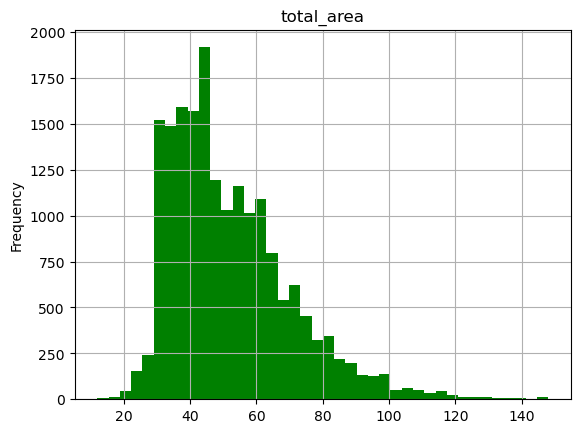

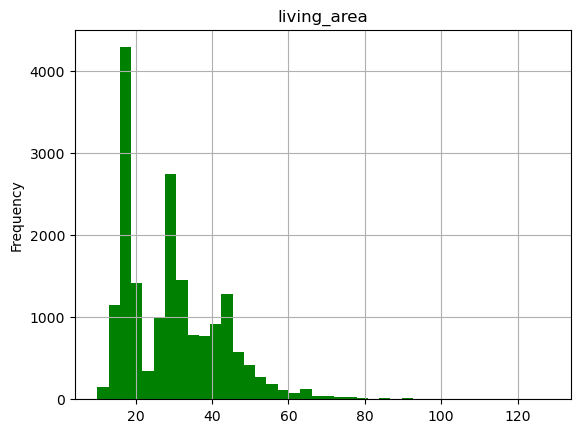

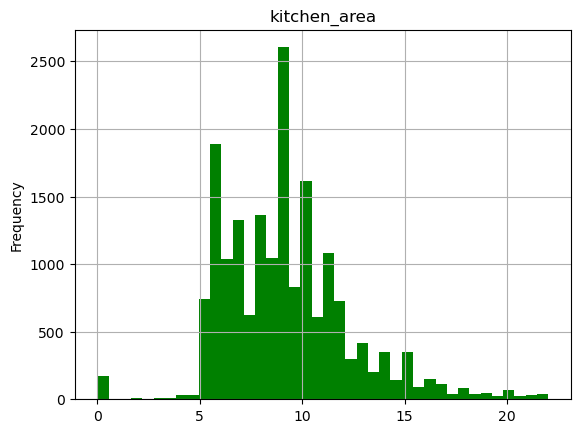

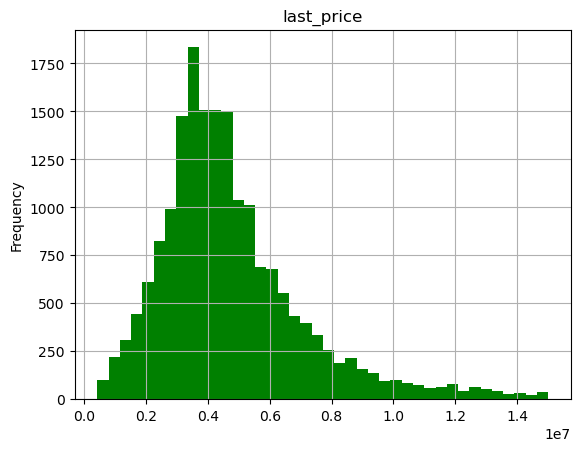

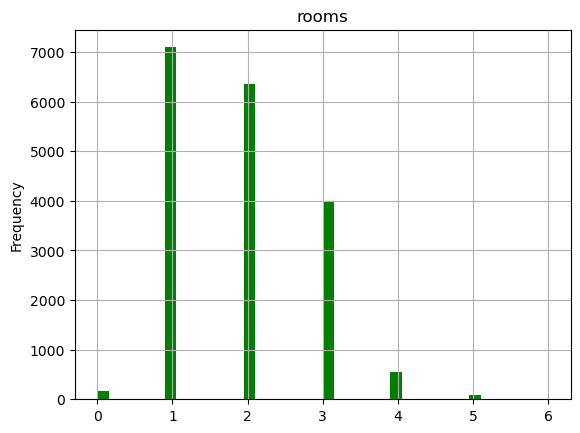

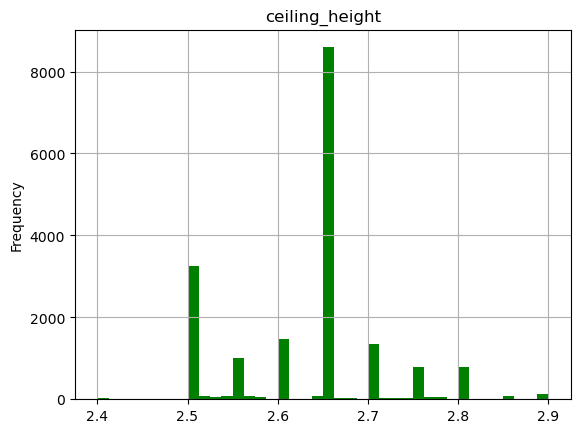

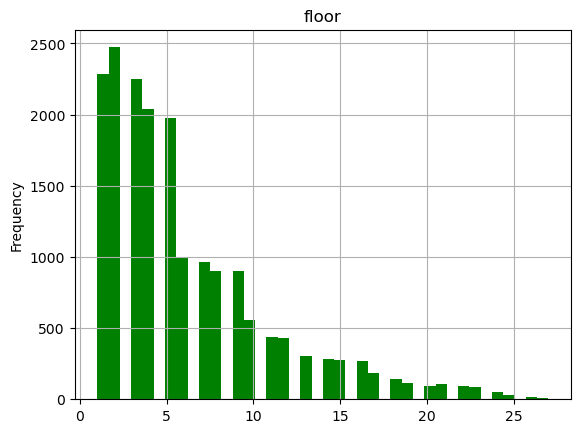

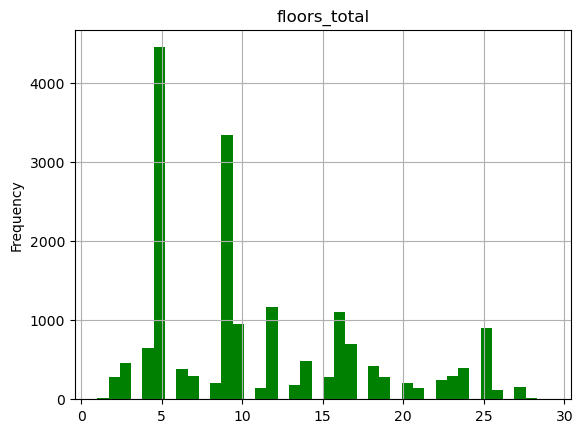

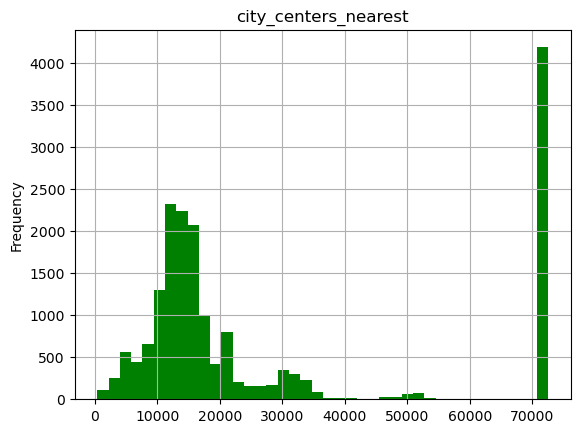

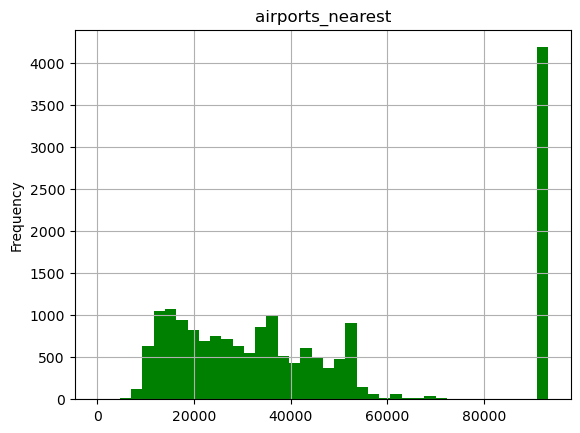

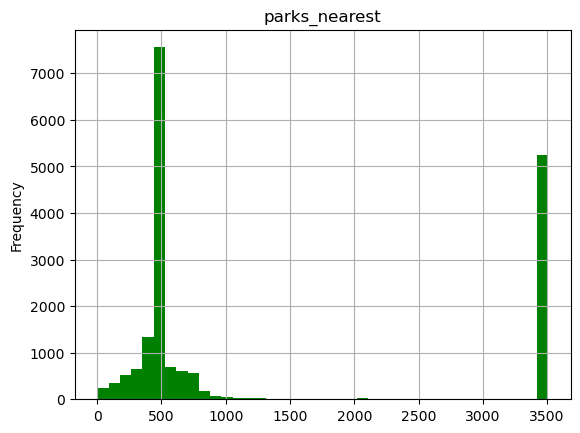

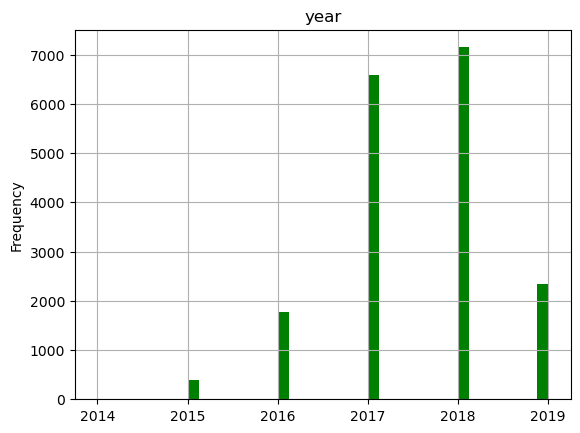

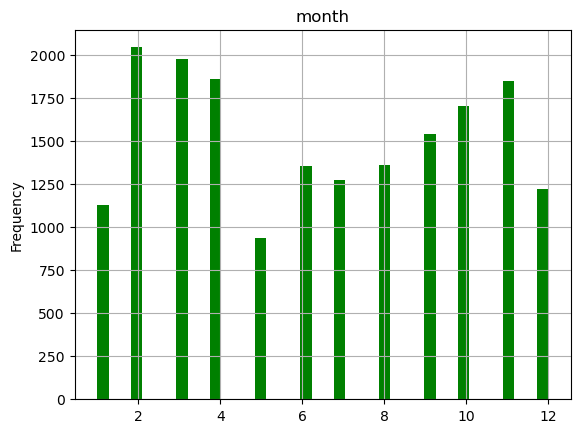

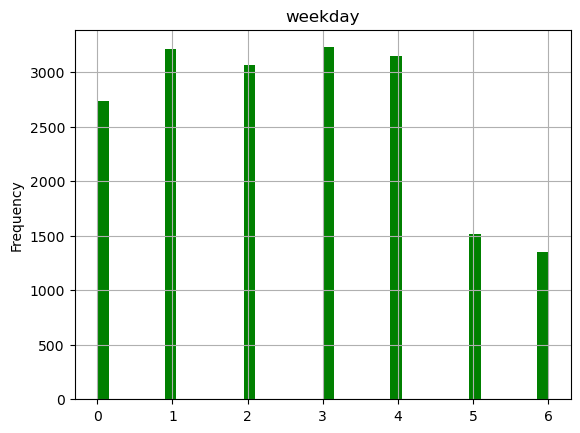

In [57]:
lst = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
 'ceiling_height', 'floor', 'floors_total', 'city_centers_nearest',
 'airports_nearest', 'parks_nearest', 'year',  'month', 'weekday']

for column in lst:
    data_clear[column].plot(kind='hist', grid=True, bins=40, title=column, color='green')
    plt.show()


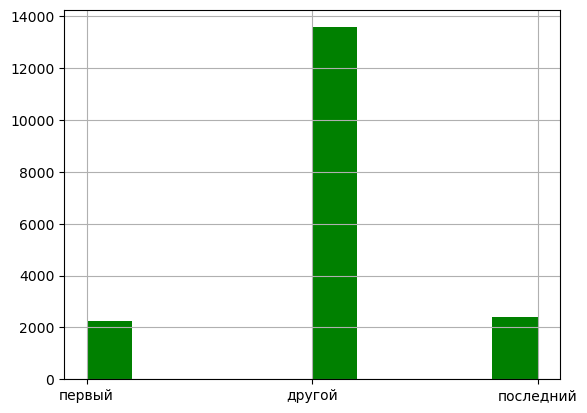

In [58]:
data_clear.floor_type.hist(color='green', grid=True);

- На рынке жилого фонда преобладают квартиры из малоэтажных зданий в 5 и 9 этажей с общей площадью 30-45 м2, что вполне реалистично, так как такие дома более распростронены по стране, чем высотки.
- Низкие этажи, вплоть до 6, в продаже встречаются намного чаще остальных. Не может быть 17 этажа в пятиэтажке. 
- Первый и последний этажи занимают примерно четверь рынка всех квартир.
- Большую долю рынка занимают однокомнатные квартиры, трехкомнатные продают почти в два раза реже.
- Чаще всего размер жилой площади соствляет 17 м2 +/-, раза в два меньше квартир с жилой площадью около 30 м2 и примерно 1/6 часть квартир - в районе 40-42 м2.
- Пики площадей кухни приходятся на 6 и 9 м2.
- Высота потолков в основном 2,65 м.
- Огромное количество предложений в ценовом диапазоне от 3_000_000 до 5_000_000 в пределах 10-16 км от центра города и с парковыми зонами в шаговой доступности каких-то 500 м.
- Больше предложений можно встретить осенью и весной, меньше зимой и летом.
- В будни объявления размещаются активнее, чем в выходные.
- Ощутимая часть жилых объектов находится вдали от аэропортов, парков и центра города - это следствие заполнения пропусков в этих данных максимальных значений. В дальнейшем будет повод вернуться и детальнее проработать данные в этих столбцах.

#### Как быстро продавались квартиры 

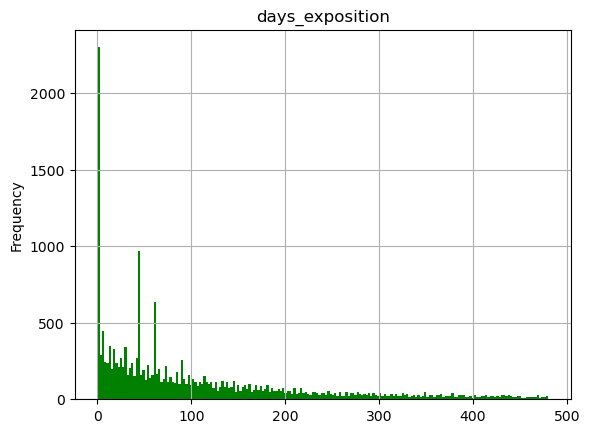

In [59]:
data_clear.days_exposition.plot(kind='hist', grid=True, bins=200, title='days_exposition', color='green');

In [60]:
data_clear.days_exposition.describe()

count    18260.000000
mean       105.273549
std        113.447640
min          0.000000
25%         21.000000
50%         61.000000
75%        153.000000
max        480.000000
Name: days_exposition, dtype: float64

Если решил продать квартиру - три месяца реальный срок продажи, ориентируйся на него. 

Когда твоя квартира конфетка без каких-либо проблем и по вкусной цене, то не удивляйся покупателю в первые дни размещения. В течении 40 дней точно продажа состоится.

Прошло три месяца, а покупателя нет - есть повод задуматься о проработке объявления.

И однозначно надо менять стратегию продажи, если 5-6 месяцев и больше нет покупателя. 

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

- Общая площадь

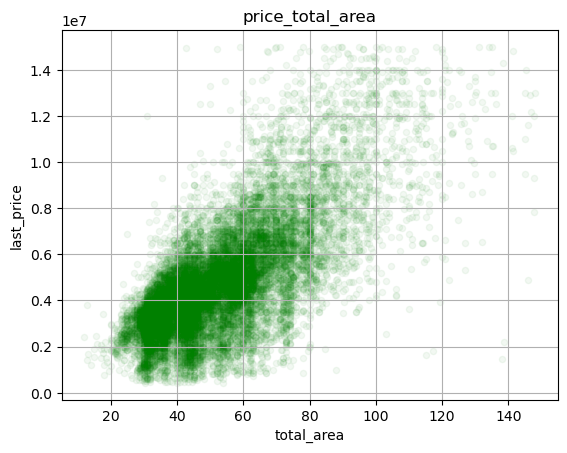

In [61]:
data_clear.plot(kind='scatter', x='total_area', y='last_price', alpha=0.05, grid=True, color='green',
               title='price_total_area');

In [62]:
data_clear.total_area.corr(data_clear.last_price)

0.7112548522119932

Чем больше площадь квартиры - тем выше стоимость. Ничего удивительного.

- Жилая площадь


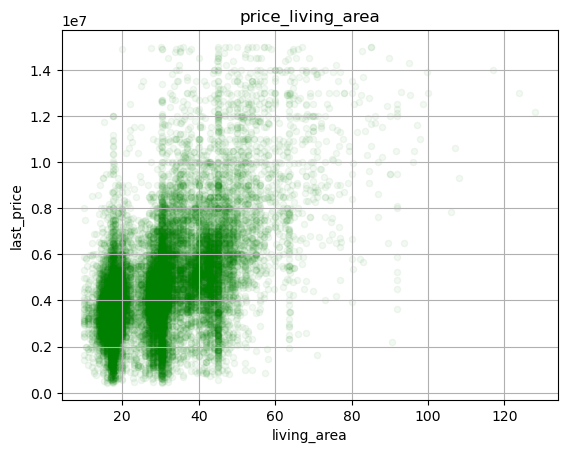

In [63]:
data_clear.plot(kind='scatter', x='living_area', y='last_price', alpha=0.05, grid=True, color='green',
               title='price_living_area');

In [64]:
data_clear.living_area.corr(data_clear.last_price)

0.566985439558908

Если увеличивется жилая площадь, то однозначно увеличивается обшая, а при увеличении общей площади растет цена. В данном случае на увеличении цены сказывается все то же увеличение общей площади.

- Площадь кухни

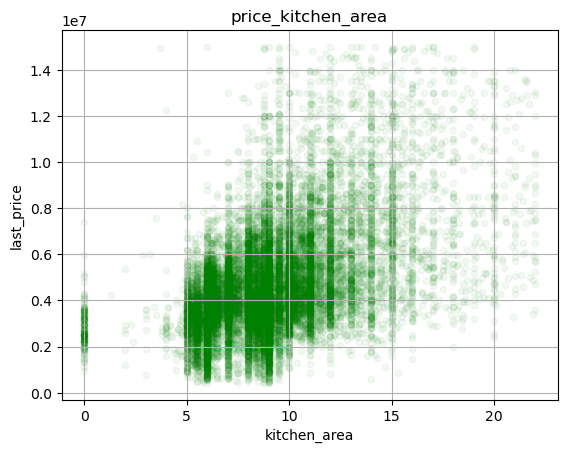

In [65]:
data_clear.plot(kind='scatter', x='kitchen_area', y='last_price', alpha=0.05, grid=True, color='green',
               title='price_kitchen_area');

In [66]:
data_clear.kitchen_area.corr(data_clear.last_price)

0.4895514800675353

Аналогичная картина с жилой площадью, только зависимость еще меньше.

- Количество комнат

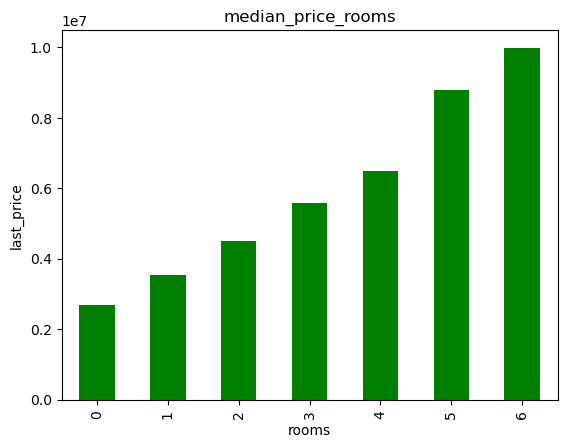

In [67]:
data_clear.pivot_table(index='rooms', values='last_price', aggfunc='median')\
.plot(kind='bar', color='green', ylabel='last_price', title='median_price_rooms', legend=False);

С увеличением числа комнат, растет цена квартиры.

Это же естественно: растет число комнат --> растет жилая площадь --> растет общая площадь --> цена выше.

- Этаж, на котором расположена квартира 

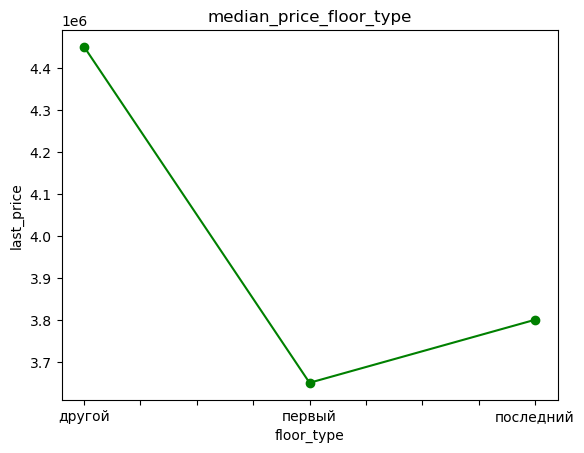

In [68]:
data_clear.pivot_table(index='floor_type', values='last_price', aggfunc='median')\
.plot(color='green', style='o-', title='median_price_floor_type', ylabel='last_price', legend=False);

Цена первых этажей ниже последних, которые дешевле всех остальных этажей.

- Дата размещения (день недели, месяц, год)

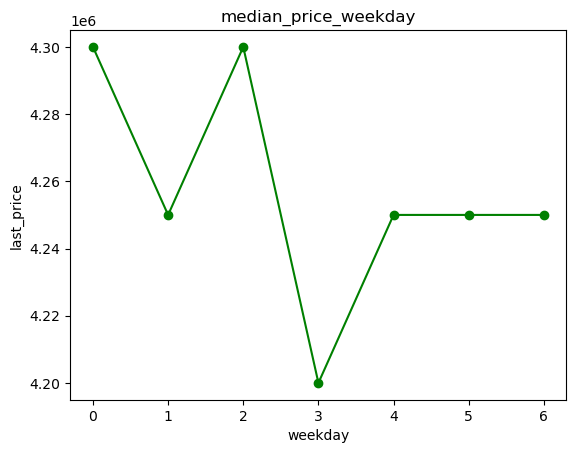

In [69]:
data_clear.pivot_table(index='weekday', values='last_price', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_price_weekday', legend=False);

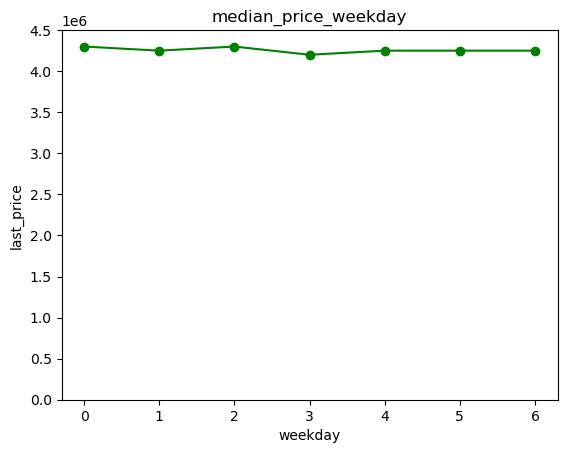

In [70]:
data_clear.pivot_table(index='weekday', values='last_price', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_price_weekday', ylim=(0,4_500_000), legend=False);

Квартиры, размещенные посреди рабочей недели ощутимо дороже, чего не сказать о "пятничных" - самые дешевые.

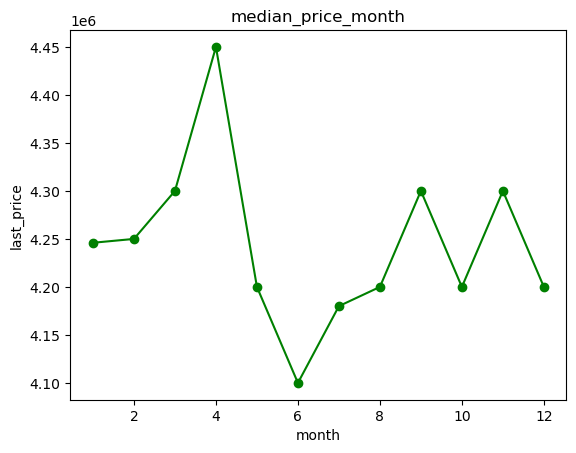

In [71]:
data_clear.pivot_table(index='month', values='last_price', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_price_month', legend=False);

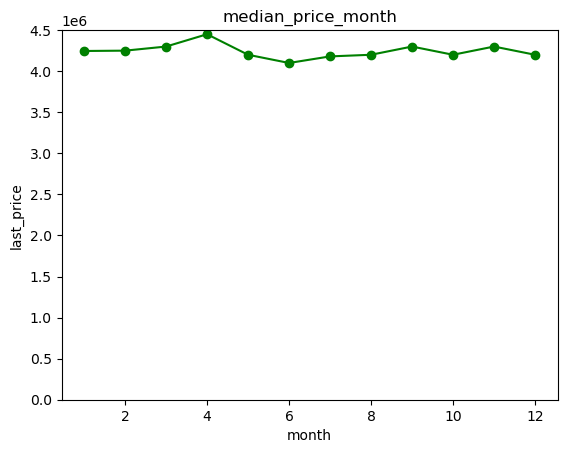

In [72]:
data_clear.pivot_table(index='month', values='last_price', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_price_month', ylim=(0, 4_500_000), legend=False);

Заметное повышение цен на жилые объекты наблюдается в апреле, но если подождать середины лета, то можно сделать выгодное вложение в недвижимость.

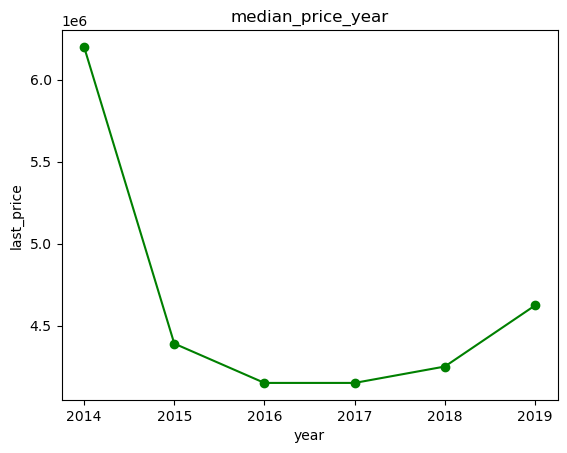

In [73]:
data_clear.pivot_table(index='year', values='last_price', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_price_year', legend=False);

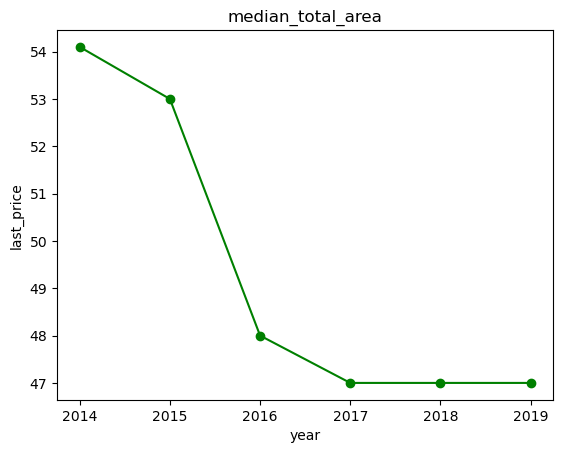

In [74]:
data_clear.pivot_table(index='year', values='total_area', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_total_area', legend=False);

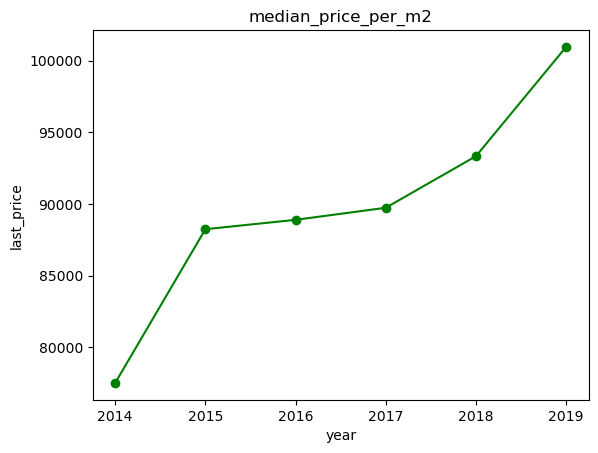

In [75]:
data_clear.pivot_table(index='year', values='price_per_m2', aggfunc='median')\
.plot(color='green', style='o-', ylabel='last_price', title='median_price_per_m2', legend=False);

После 2014 произошло довольно ощутимое падение цен на жилые объекты, и только к 2018 году начался рост цен.

И это не смотря на то, что площадь продаваемых квартир снижалась, а цена за квадратный метр увеличивалась.

#### 	Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [76]:
top_10_count = data_clear.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]

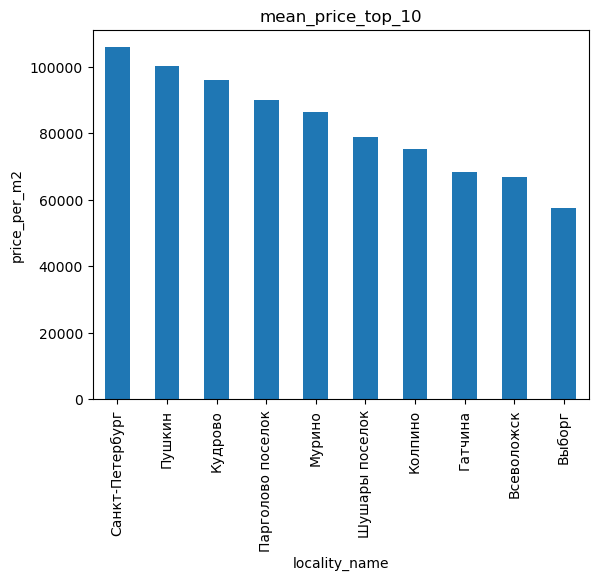

In [77]:
data_clear[['locality_name','price_per_m2']].query("locality_name in @top_10_count.index")\
.groupby('locality_name')['price_per_m2'].mean().sort_values(ascending=False)\
.plot(kind='bar', ylabel='price_per_m2', title='mean_price_top_10', legend=False);

Самая высокая стоимость за м2 в Санкт-Петербурге, а самая низкая в Выборге.

#### Санкт-Петербург. средняя цена каждого километра. Как стоимость объектов зависит от расстояния до центра города.

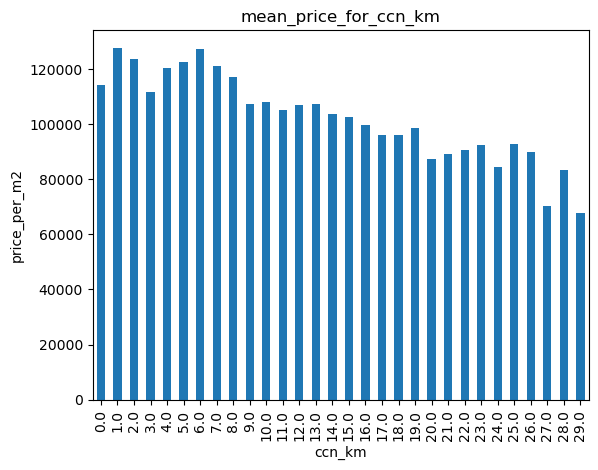

In [78]:
data_clear.query("locality_name == 'Санкт-Петербург'")[['ccn_km','price_per_m2']]\
.groupby('ccn_km')['price_per_m2'].mean()\
.plot(kind='bar', ylabel='price_per_m2', title='mean_price_for_ccn_km');

Чем дальше от центра города - тем ниже цена. Оно и понятно. В центре жизнь бурлит, в а с окраины надо еще и доехать до центра.

### Общий вывод

Что же, абсолютно не простая ситуация.

Огромное количество пропусков в предоставленной базе данных было заменено синтетическими значениями. А после отбрасывания выбросов осталось 70% данных.

Но где "наша" не пропадала. Что есть - то есть.

Что можно сказать?

- Абсолютно естественно: больше общая площадь квартиры - больше цена. Сюда же входит такие параметры, как жилая площадь и площадь кухни, количество комнат, ведь увеличение каждого из этих параметров влечет увеличение общей площади.
- Хочешь купить квартиру - твое время лето, а если продать - весна и осень. Летом цена продажи квартир ниже. А пик высоких цен приходится на весну и осень.
- Цена в городе на жилье всегда выше, чем в прилежащих населенных пунктах. Более того, чем ближе к центру города - тем дороже.
- Обычно, жилое помещение продается в течение трех месяцев.
- Чаще продастся однокомнатные квартиры и их модификации (студии к примеру).
- Первый и последний этаж менее выгодное вложение средств.
- Интересный факт: к концу рабочей недели цена размещаемых объектов ощутимо ниже.
- Немаловажный фактор вносит год покупки/продажи жилья. От года к году цены меняются. Возможно, здесь влияет такой фактор как общая экономическая ситуация.

In [79]:
sss = data_clear.pivot_table(index='year', values='days_exposition', aggfunc= ['count', lambda x: (x==0).sum()]).copy()
sss.columns = ['count', 'omissions']
sss

,count,omissions
year,,
2014,5,5
2015,397,33
2016,1782,38
2017,6581,156
2018,7149,649
2019,2346,1415


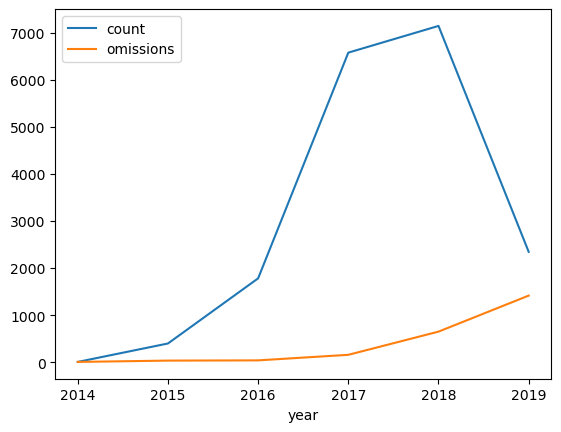

In [80]:
sss.plot();

Если посмотреть, то квартиры, выставленные на продажу в последний год, не имеют данных days_exposition. Что подтверждает, что объявление еще не закрыто. 